In [1]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [3]:
IPython.display.Audio(data=data, rate=rate)

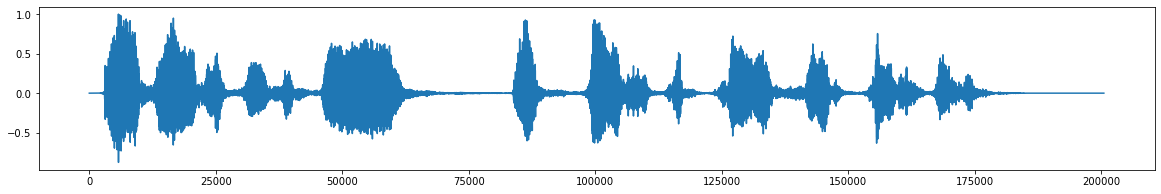

In [4]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [17]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
response = urllib.request.urlopen(url)
noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

(-999.95, 20998.95, -0.321875, 0.35166015625)

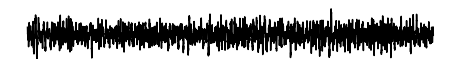

In [42]:
fig, ax = plt.subplots(figsize=(8,1))
ax.plot(noise_data[60000:80000], color = 'k')
ax.axis('off')

In [37]:
noise_data[60000:]

array([0.09332275, 0.07220459, 0.06454468, ..., 0.0758667 , 0.09469604,
       0.08792114])

In [18]:
#noise_len = 2 # seconds
#noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
#noise_clip = noise[:rate*noise_len]
#audio_clip_band_limited = data+noise

In [19]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

In [33]:
audio_clip_cafe = audio_clip_cafe[:65000]

(-3249.9500000000003, 68248.95, -0.9907920837402344, 1.157158660888672)

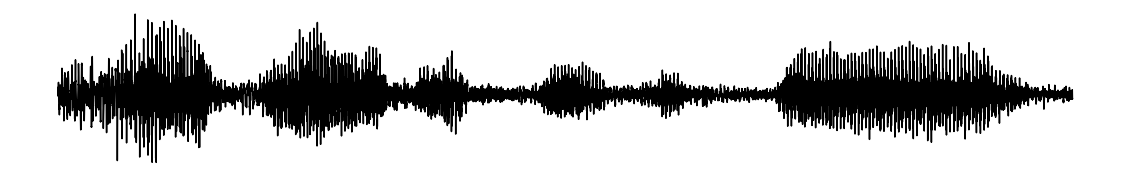

In [36]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe, color = 'k')
ax.axis('off')

(-3249.9500000000003, 68248.95, -0.9907920837402344, 1.157158660888672)

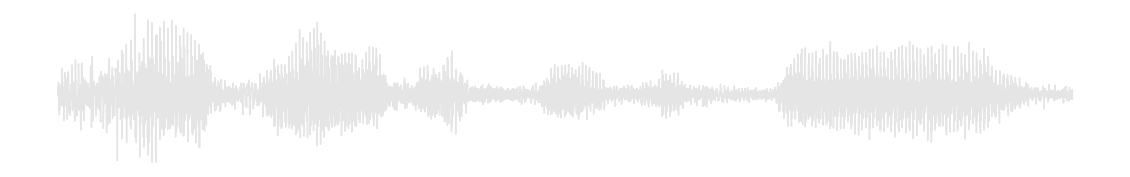

In [53]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe, color = 'k', alpha = 0.1)
ax.axis('off')

In [43]:
IPython.display.Audio(data=audio_clip_cafe, rate=rate)

In [44]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, n_std_thresh_stationary=1.0,stationary=True)

(-3249.9500000000003, 68248.95, -0.6993262510343836, 0.81808988042171)

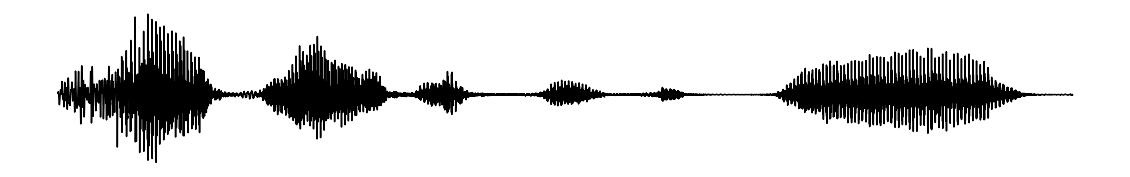

In [46]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise, color = 'k')
ax.axis('off')

In [47]:
IPython.display.Audio(data=reduced_noise, rate=rate)


In [48]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

(-1349.95, 28348.95, -0.7950037481045198, 0.9442724364864875)

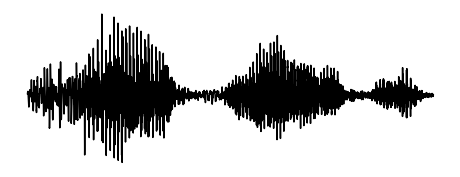

In [52]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(reduced_noise[:27000], color = 'k')
ax.axis('off')

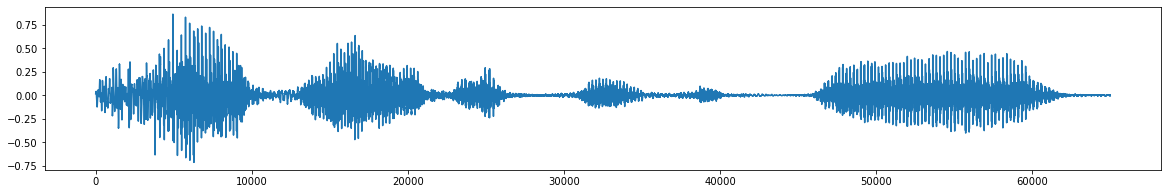

In [49]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [26]:
IPython.display.Audio(data=reduced_noise, rate=rate)
